# Microéconomie 5
## TD2 : L’équilibre concurrentiel dans une économie d’échange

### Exercice 2 : Préférences quasi-linéaires

Les dotations initiales sont $\omega^A = (16, 4)$ et $\omega^B = (3, 6)$. Les agents ont les préférences

\begin{aligned}
    U^A(x^A) &= \ln(x_1^A) + x_2^A \\
    U^B(x^B) &= 2\ln(x_1^B) + x_2^B.
\end{aligned}
    
Le code suivant commence par définir ces données du problème.

**Dans le code ci-dessous, vous pouvez modifier librement les dotations $\omega^A$ et $\omega^B$ pour voir comment cela affecte les résultats.**

In [1]:
omegaA <- c(16, 4)                           # dotation initiale de A
omegaB <- c(3, 6)                            # dotation initiale de B
omega1 <- omegaA[1] + omegaB[1]              # dotation totale en bien 1
omega2 <- omegaA[2] + omegaB[2]              # dotation totale en bien 2
UA <- function(x1, x2) log(x1) + x2          # fonction d'utilité de A
UB <- function(x1, x2) 2*log(x1) + x2        # fonction d'utilité de B

Les fonctions d'utilité de $A$ et de $B$ sont **quasi-linéaires** (avec première partie concave) : les deux agents ont donc des préférences **convexes** (voir TD1). Les courbes d'indifférence s'obtiennent avec
\begin{aligned}
    U^A(x^A) = U_0 &\iff x_2^A = U_0 - \ln(x_1^A) \\
    U^B(x^B) = U_0 &\iff x_2^B = U_0 - 2 \ln(x_1^B).
\end{aligned}

Comme dans les exercices précédents, je définis `x1` une série de valeurs de $x_1$ pour tracer les courbes, et deux fonctions `indiffA` et `indiffB` qui renvoient les points de la courbe d'indifférence associée à un niveau d'utilité `U` donné.

In [2]:
x1 <- seq(0, omega1, length=1000)

indiffA <- function(U) U - log(x1)
indiffB <- function(U) U - 2*log(x1)

Je trace ensuite les courbes d'indifférence : celles de $A$ en bleu et celles de $B$ en orange.

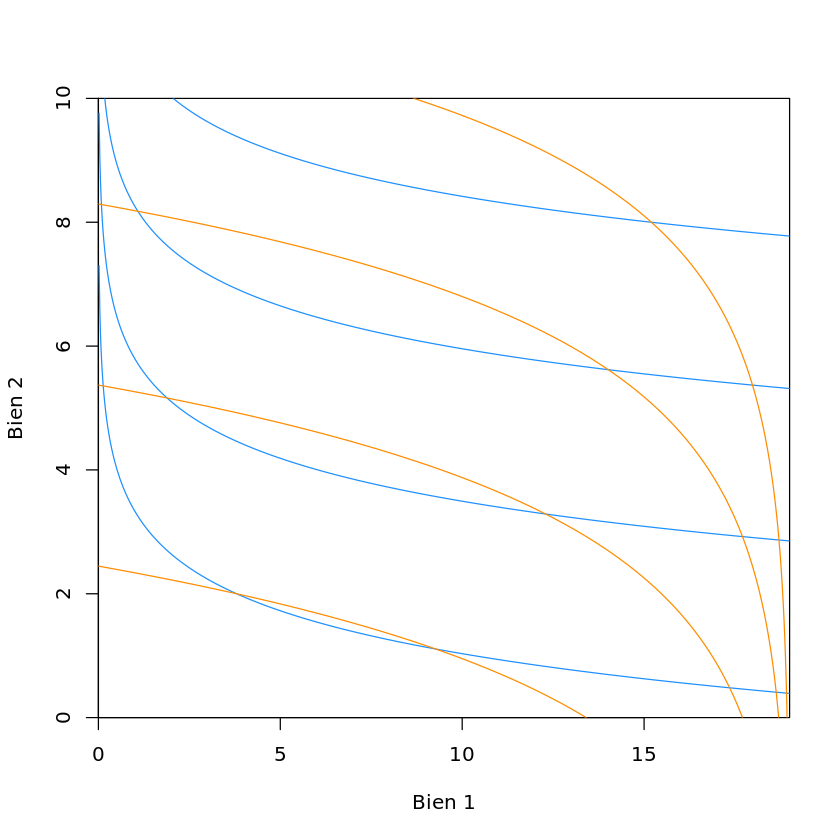

In [3]:
niveauxA <- seq(UA(omega1/5, omega2/5), UA(4*omega1/5, 4*omega2/5), len = 4)
niveauxB <- seq(UB(omega1/5, omega2/5), UB(4*omega1/5, 4*omega2/5), len = 4)

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", xlab = "Bien 1", ylab = "Bien 2", xaxs = "i", yaxs = "i")
for (U in niveauxA) lines(x1, indiffA(U), col = "dodgerblue", ylim = c(0, omega2))                # CI de A
for (U in niveauxB) lines(x1, rev(omega2 - indiffB(U)), col = "darkorange", ylim = c(0, omega2))  # CI de B

On cherche maintenant l'équilibre concurrentiel de cette économie. On répète les deux étapes : trouver les **fonctions de demande de chaque agent**, puis écrire l'**équilibre d'un des deux marchés de bien**.

**1. Fonctions de demande**

Pour un vecteur de prix $p = (p_1, p_2)$ donné chaque agent forme ses demandes en maximisant son utilité sous sa contrainte de budget.  

Pour $A$, cela veut dire

\begin{equation}
    \max_{x^A} \; U^A(x^A) \qquad \text{s.c.} \; p \cdot x^A \leq p \cdot \omega^A
\end{equation}

donc le lagrangien associé est
\begin{equation}
    \mathcal L(x^A, \mu) = \ln(x_1^A) + x_2^A + \mu(p \cdot \omega^A - p \cdot x^A)
\end{equation}

et les conditions du premier ordre
\begin{aligned}
    &\frac{1}{x_1^A} - \mu p_1 = 0 \\
    &1 - \mu p_2 = 0 \\
    &p \cdot x^A = p \cdot \omega^A.
\end{aligned}

On en déduit
\begin{equation}
    \underbrace{\frac{1}{x_1^A}}_{= \mathsf{TMS}^A} = \frac{p_1}{p_2} \iff x_1^A = \frac{p_2}{p_1}
\end{equation}

qui nous fournit directement la demande en bien 1. La demande en bien 2 est donc donnée par

\begin{equation}
    x_2^A = \frac{p \cdot \omega^A - p_1 x_1^A}{p_2} = \frac{p_1}{p_2} \omega_1^A + \omega_2^A - 1
\end{equation}

et on peut vérifier qu'avec l'allocation choisie, $\omega^A = (16, 4)$, cette demande en bien 2 est bien positive.

Pour résumer,

\begin{equation}
    \boxed{ x_1^A(p) = \frac{p_2}{p_1} }
    \quad \text{ et } \quad
    \boxed{ x_2^A(p) = \frac{p_1}{p_2} \omega_1^A + \omega_2^A - 1 }.
\end{equation}

Pour $B$, on trouve de façon similaire

\begin{equation}
    \boxed{ x_1^B(p) = \frac{2 p_2}{p_1} }
    \quad \text{ et } \quad
    \boxed{ x_2^B(p) = \frac{p_1}{p_2} \omega_1^B + \omega_2^B - 2 }.
\end{equation}

(On vérifie aussi que la demande en bien 2 de $B$ est positive pour les valeurs de $\omega^B$ choisies.)


**2. Équilibre du marché de bien 1**

À l'équilibre concurrentiel le marché du bien 1 doit être équilibré :

\begin{equation}
    x_1^A(p) + x_1^B(p) = \omega_1
    \iff \frac{p_2}{p_1} + \frac{2 p_2}{p_1} = \omega_1
    \iff \boxed{ \frac{p_1}{p_2} = \frac{3}{\omega_1} } \overset{\text{A.N.}}{=} \frac{3}{19}.
\end{equation}

Nous avons différentes expressions pour les demandes selon les valeurs de $p$, $\omega^A$, et $\omega^B$, donc il faut distinguer les cas. 

**Si $p_2 \leq p \cdot \omega^A$ et $2 p_2 \leq p \cdot \omega^B$,** alors l'équilibre du marché du bien 1 s'écrit

\begin{equation}
    \frac{p_2}{p_1} + \frac{2p_2}{p_1} = \omega_1 \iff \boxed{\frac{p_1}{p_2} = \frac{3}{\omega_1}} \overset{\text{A.N.}}{=} \frac{3}{19}.
\end{equation}

On réinjecte ce rapport de prix dans les fonctions de demande des agents pour trouver les allocations d'équilibre :

\begin{equation}
    \boxed{ x_1^A = \frac{19}{3}, \quad x_2^A = \frac{105}{19}, \qquad x_1^B = \frac{38}{3}, \quad x_2^B = \frac{85}{19} }.
\end{equation}

Représentons maintenant l'équilibre dans la boîte d'Edgeworth (cas interne seulement). Je définis en premier lieu les demandes de chaque agent selon le vecteur de prix `p` auquel ils font face, puis le rapport des prix à l'équilibre `r` selon la formule trouvée ci-dessus (la fonction `crossprod` correspond au produit scalaire).

In [4]:
x1A <- function(p) p[2]/p[1]
x2A <- function(p) (crossprod(p, omegaA) - p[2])/p[2]
x1B <- function(p) 2*p[2]/p[1]
x2B <- function(p) (crossprod(p, omegaB) - 2*p[2])/p[2]
r <- 3/omega1

Je définis l'allocation $I$ de départ, ainsi que l'allocation d'équilibre $E$ (j'utilise $p_1 =$ `r` et $p_2 = 1$).

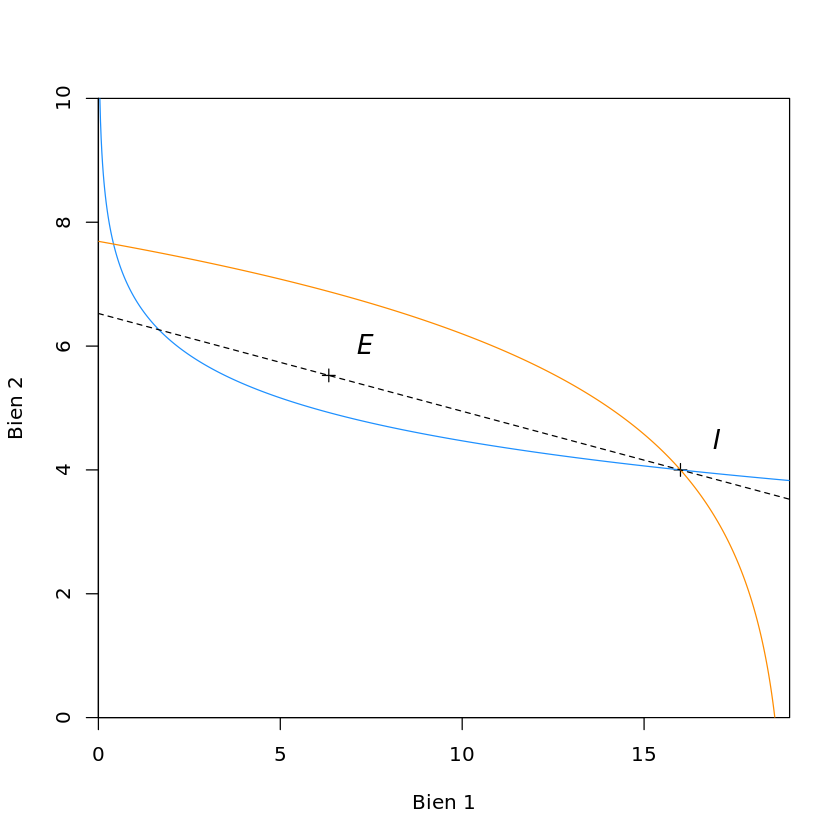

In [5]:
I <- omegaA                                   # dotations initiales
E <- c(x1A(c(r, 1)), x2A(c(r, 1)))            # équilibre concurrentiel

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                              # allocation initiale I
    text(I[1]+.05*omega1, I[2]+.05*omega2, labels = "I", cex = 1.3, font = 3)
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, omega2))              # indifférence de A
lines(x1, rev(omega2 - indiffB(UB(omega1 - I[1], omega2 - I[2]))), col = "darkorange", ylim = c(0, omega2)) # indiff. B
lines(x1, r*omegaA[1] + omegaA[2] - r*x1, lty = 2)                                       # contrainte de budget à l'équilibre
points(E[1], E[2], pch=3)                                                                # équilibre concurrentiel E
    text(E[1]+.05*omega1, E[2]+.05*omega2, labels = "E", cex = 1.3, font = 3)

De nouveau, essayons de tracer la courbe des optima selon la méthode vue au TD1 (en violet).

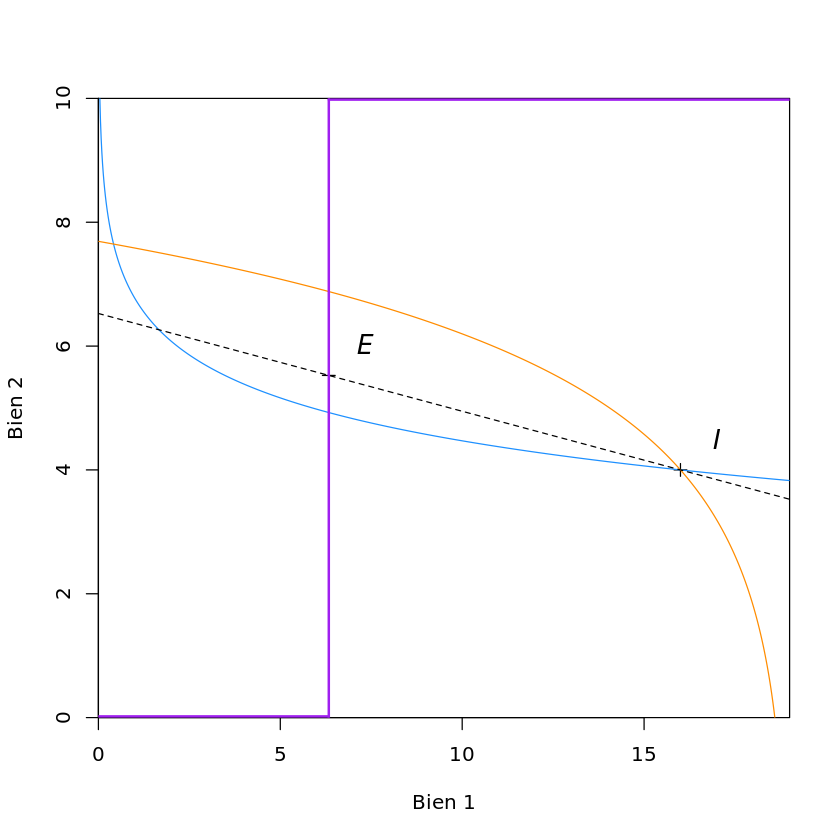

In [6]:
plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                              # allocation initiale I
    text(I[1]+.05*omega1, I[2]+.05*omega2, labels = "I", cex = 1.3, font = 3)
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, omega2))              # indifférence de A
lines(x1, rev(omega2 - indiffB(UB(omega1 - I[1], omega2 - I[2]))), col = "darkorange", ylim = c(0, omega2)) # indiff. B

lines(x1, r*omegaA[1] + omegaA[2] - r*x1, lty = 2)                                       # contrainte de budget à l'équilibre
points(E[1], E[2], pch=3)                                                                # équilibre concurrentiel E
    text(E[1]+.05*omega1, E[2]+.05*omega2, labels = "E", cex = 1.3, font = 3)

lines(c(omega1/3, omega1/3), c(0, omega2), lwd = 2, col = "purple")                      # optima intérieurs
lines(c(omega1/3, omega1), c(omega2, omega2)-.002*omega2, lwd = 2, col = "purple")       # optima en coin : x2A = 0
lines(c(0, omega1/3), c(0, 0)+.002*omega2, lwd = 2, col = "purple")                      # optima en coin : x2B = 0

On observe encore que **l'allocation d'équilibre concurrentiel est un optimum de Pareto**, c'est-à-dire le premier théorème du bien-être.